# Analyzing the supermarket dataset to boost the sales.


This project works with the dataset of a supermarket which includes sales, customer segment, region, product details like product-id,name, price. Also it include shipment details and order details like order_id, customer name, quantity purchased, profit on that sale etc. This data has been taken from kaggle and through this dataset we would like to give some key business insights and suggestions to supermarket owners as to how they can increase their profit by targeting right customer base and with right products. 
With this analysis we will also give a idea of premium membership which will increase their loyal customer base.



### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The name of the dataset is Superstore Dataset and can be found here 'https://www.kaggle.com/vivek468/superstore-dataset-final'


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/vivek468/superstore-dataset-final' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: devanshmathur14
Your Kaggle Key: ········


100%|██████████| 550k/550k [00:00<00:00, 90.1MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './superstore-dataset-final'

In [5]:
import os
os.listdir(data_dir)

['Sample - Superstore.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "supermarket-data-analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devmat14/supermarket-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/devmat14/supermarket-data-analysis


'https://jovian.ai/devmat14/supermarket-data-analysis'

## Data Preparation and Cleaning

Cleaning, understanding and exploring the dataset for better understanding for further analysis that is going to be done.
We will focus our analysis to make use of this data help the supermarkets increase their sales. As this is a huge data set we will clean it and make it more precise for better analysis. 



In [10]:
import pandas as pd

In [11]:
supermarket_rawdata_df = pd.read_csv(data_dir + "/Sample - Superstore.csv", encoding='windows-1252')

In [12]:
supermarket_rawdata_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [13]:
supermarket_rawdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [15]:
supermarket_df = supermarket_rawdata_df[['Order ID', 'Order Date' , 'Ship Mode' , 'Customer ID' , 'Customer Name' , 'Segment' , 'City' , 'Region' , 'Product ID','Category','Sub-Category','Product Name','Sales','Quantity','Discount','Profit']]
supermarket_df

,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,City,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2/26/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2/26/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2/26/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


The columns which are not going to be used in our analysis has been droped such as ship date, postal code, Country.


In [16]:
total_sales = supermarket_df.Sales.sum()
total_sales

2297200.8603000003

In [17]:
total_profit = supermarket_df.Profit.sum()
total_profit

286397.0217

In [18]:
profit_precent = total_profit/total_sales * 100
profit_precent

12.467217240315604

the total sales of the store is 2297200.86 and the total profit is 286397.0217 which makes the total profit percentage of 12.46%



In [19]:
supermarket_df.shape


(9994, 16)

the data has total of 9994 entries and 16 columns.

In [20]:
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Mode      9994 non-null   object 
 3   Customer ID    9994 non-null   object 
 4   Customer Name  9994 non-null   object 
 5   Segment        9994 non-null   object 
 6   City           9994 non-null   object 
 7   Region         9994 non-null   object 
 8   Product ID     9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 1.2+ MB


In [21]:
supermarket_df.columns = [a.replace(' ', '_') for a in supermarket_df.columns]
supermarket_df.columns = [a.replace('-', '_') for a in supermarket_df.columns]

In [23]:
supermarket_df["Order_Date"] = pd.to_datetime(supermarket_df["Order_Date"])
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Order_Date     9994 non-null   datetime64[ns]
 2   Ship_Mode      9994 non-null   object        
 3   Customer_ID    9994 non-null   object        
 4   Customer_Name  9994 non-null   object        
 5   Segment        9994 non-null   object        
 6   City           9994 non-null   object        
 7   Region         9994 non-null   object        
 8   Product_ID     9994 non-null   object        
 9   Category       9994 non-null   object        
 10  Sub_Category   9994 non-null   object        
 11  Product_Name   9994 non-null   object        
 12  Sales          9994 non-null   float64       
 13  Quantity       9994 non-null   int64         
 14  Discount       9994 non-null   float64       
 15  Profit         9994 n

/tmp/ipykernel_36/3419241781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supermarket_df["Order_Date"] = pd.to_datetime(supermarket_df["Order_Date"])


In [28]:
supermarket_df = supermarket_df.sort_values(by = 'Order_Date')

In [29]:
supermarket_df

,Order_ID,Order_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
7980,CA-2014-103800,2014-01-03,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,CA-2014-112326,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,CA-2014-112326,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,CA-2014-112326,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,CA-2014-141817,2014-01-05,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,CA-2017-126221,2017-12-30,Standard Class,CC-12430,Chuck Clark,Home Office,Columbus,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110
5091,CA-2017-156720,2017-12-30,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
908,CA-2017-143259,2017-12-30,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
907,CA-2017-143259,2017-12-30,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


This has sort the order data by its date oldest to newest.

In [30]:
supermarket_df.sample(30)

,Order_ID,Order_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
546,CA-2017-162929,2017-11-19,First Class,AS-10135,Adrian Shami,Home Office,New York City,East,OFF-BI-10000404,Office Supplies,Binders,Avery Printable Repositionable Plastic Tabs,41.280,6,0.2,13.9320
2669,US-2015-139759,2015-08-25,Standard Class,NL-18310,Nancy Lomonaco,Home Office,Los Angeles,West,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,105.960,4,0.0,29.6688
953,CA-2017-136539,2017-12-28,Standard Class,GH-14665,Greg Hansen,Consumer,Round Rock,Central,OFF-AR-10001958,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,27.168,2,0.2,2.7168
3685,CA-2015-132626,2015-07-09,Standard Class,BT-11680,Brian Thompson,Consumer,Clinton,East,OFF-ST-10003722,Office Supplies,Storage,Project Tote Personal File,98.210,7,0.0,28.4809
5618,CA-2015-101154,2015-09-18,First Class,CM-12190,Charlotte Melton,Consumer,San Diego,West,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",443.920,4,0.0,8.8784
9617,CA-2017-160633,2017-11-16,Standard Class,BS-11380,Bill Stewart,Corporate,Bowling Green,East,TEC-CO-10002095,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,899.982,3,0.4,74.9985
7148,CA-2016-139941,2016-06-12,Standard Class,CB-12415,Christy Brittain,Consumer,Long Beach,East,OFF-AP-10004036,Office Supplies,Appliances,Bionaire 99.97% HEPA Air Cleaner,52.560,3,0.0,18.3960
7994,US-2015-165743,2015-11-20,Second Class,MM-18055,Michelle Moray,Consumer,Aurora,West,FUR-BO-10002268,Furniture,Bookcases,Sauder Barrister Bookcases,145.764,6,0.7,-247.7988
9376,CA-2017-108756,2017-12-25,Standard Class,PO-18865,Patrick O'Donnell,Consumer,East Orange,East,TEC-AC-10003237,Technology,Accessories,Memorex Micro Travel Drive 4 GB,31.800,3,0.0,13.6740
3375,CA-2015-161718,2015-12-04,Standard Class,SO-20335,Sean O'Donnell,Consumer,Hempstead,East,TEC-PH-10000376,Technology,Phones,Square Credit Card Reader,39.960,4,0.0,10.3896


The data has been cleaned and some necessary changes have been made in order to do work with this dataset like :
1. Data-type change of Order_date to datetime64
2. Changing name of columns .
3. Sorting by the order_date from oldest to newest.

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devmat14/supermarket-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/devmat14/supermarket-data-analysis


'https://jovian.ai/devmat14/supermarket-data-analysis'

## Exploratory Analysis and Visualization

Before jumping into asking questions about how we can increase sales it is very important to visualize the whole data by taking different columns individually like :
1. Shipment mode
2. Sales Segment
3. Cities
4. Sales
5. month-wise sales


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Segment-wise sales

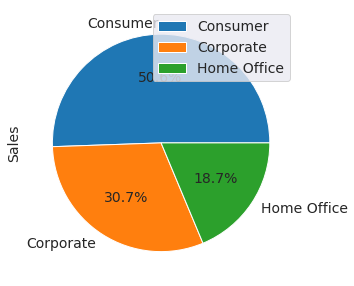

In [34]:
seg_sales_df = supermarket_df.groupby("Segment")[["Sales"]].sum().plot(kind = "pie", autopct='%1.1f%%', subplots = 'True')


This pie-chart shows that almost half of the sales is from consumer customer base for their personal usage and around 30% is from corporate customer base and 18.7% is from home office. 


### Top 5 most sold products of supermarket

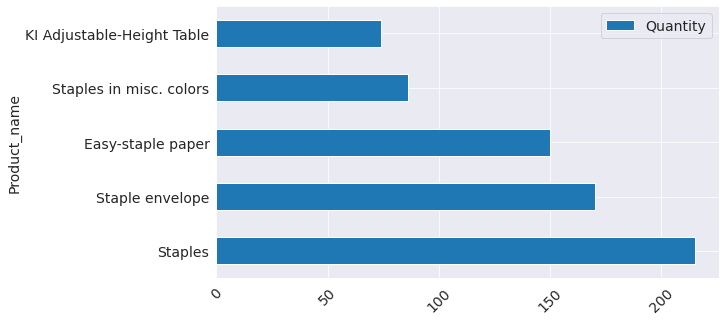

In [52]:
dff = supermarket_df.groupby("Product_Name")[["Quantity"]].sum()
dff.sort_values('Quantity', ascending = False).head(5).plot(kind = 'barh', xlabel = "Product_name", ylabel = "Quantity")
plt.xticks(rotation=45)
plt.show(block=True)

Here we can see that the most sold product is staples with the quantity of almost 210 which is followed by staple envelope and easy-staple paper. So, we in order to increase the time period of customer in supermarket we can keep these items at the last section of the store which will make customer go through much more stuff and may increase the sales.

Top 5 most selling sub-categories.


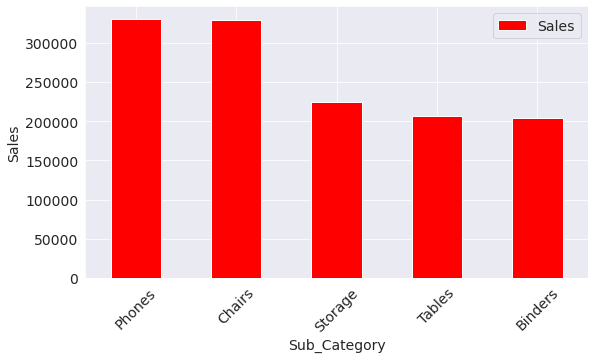

In [55]:
top_categories1 = supermarket_df.groupby("Sub_Category")[["Sales"]].sum().sort_values('Sales', ascending = False).head(5)
top_categories1.plot(kind = 'bar', xlabel = "Sub_Category", ylabel = "Sales", color = 'red')

plt.xticks(rotation=45)
plt.show(block=True)


Since the sales in the Categories of phones and Chairs are maximum we can increase the area and staff allocated for these categories so that customers are more satisfied and thus foot-fall will gradually increase.

### Monthwise sales of the supermarket

In [57]:
supermarket_df['month'] = pd.DatetimeIndex(supermarket_df.Order_Date).month


In [128]:
month_sales_df = supermarket_df.groupby("month")[["Sales"]].sum()

month_sales_df


,Sales
month,
1,94924.8356
2,59751.2514
3,205005.4888
4,137762.1286
5,155028.8117
6,152718.6793
7,147238.0970
8,159044.0630
9,307649.9457


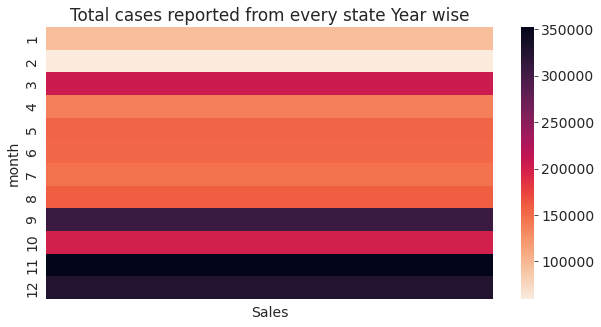

In [127]:
plt.figure(figsize=(10,5))
plt.title("Total cases reported from every state Year wise")
cmap = sns.cm.rocket_r
sns.heatmap(month_sales_df, annot=False,  cmap = cmap);

we can see that during summers the customers are reduced and in winter in month of oct, nov and dec during festival season of christmas the sales are high.
maybe we can hire some extra part-time labour during these months.

### Year-wise sales of the supermarket

In [131]:
supermarket_df['year'] = pd.DatetimeIndex(supermarket_df.Order_Date).year

In [133]:
yearly_sales_df = supermarket_df.groupby("year")[["Sales"]].sum()
yearly_sales_df

,Sales
year,
2014,484247.4981
2015,470532.5090
2016,609205.5980
2017,733215.2552


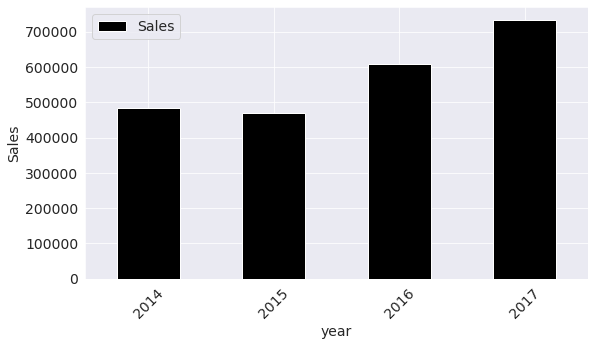

In [134]:
yearly_sales_df.plot(kind = 'bar', xlabel = "year", ylabel = "Sales", color = 'black')

plt.xticks(rotation=45)
plt.show(block=True)

This graph gives a very promising growth of the supermarket as clearly from last three years their has been constant growth in the sales. With best sales in 2017 of above 700000.

### Shipping Mode 

In [80]:
shipping_df = supermarket_df.Ship_Mode.value_counts()
shipping_df

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship_Mode, dtype: int64

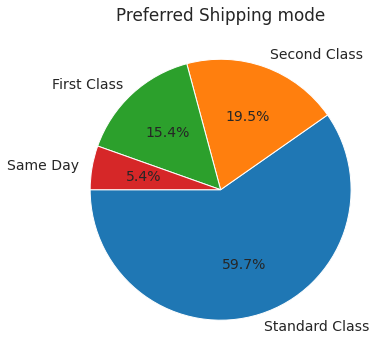

In [81]:
plt.figure(figsize=(12,6))
plt.title('Preferred Shipping mode')
plt.pie(shipping_df, labels=shipping_df.index, autopct='%1.1f%%', startangle=180);

Most people prefer the standard class shipping which constitute of 60% of total orders. Same day delivery is least prefered as it might include high shipping charges. Maybe we can increase more same day delivery and reduce its charges so that it attracts more people. 

Let us save and upload our work to Jovian before continuing

In [82]:
import jovian

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devmat14/supermarket-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/devmat14/supermarket-data-analysis


'https://jovian.ai/devmat14/supermarket-data-analysis'

## Asking and Answering Questions

Based on the above analysis we are now going to answer some questions which will help supermarket owners to understand their market. This will also help them increase the foot-fall in the store there-by boosting their sales and profits. 



#### Q1: Top three most loyal customers and their sales?

In [87]:
loyal_cust_df1 = supermarket_df.groupby("Customer_ID")[["Sales", "Customer_Name"]].sum().sort_values('Sales', ascending = False).head(3)
loyal_cust_df1


,Sales
Customer_ID,
SM-20320,25043.050
TC-20980,19052.218
RB-19360,15117.339


In [88]:
bb = supermarket_df[['Customer_ID','Customer_Name']]


,Customer_ID,Customer_Name
7980,DP-13000,Darren Powers
739,PO-19195,Phillina Ober
740,PO-19195,Phillina Ober
741,PO-19195,Phillina Ober
1759,MB-18085,Mick Brown
...,...,...
645,CC-12430,Chuck Clark
5091,JM-15580,Jill Matthias
908,PO-18865,Patrick O'Donnell
907,PO-18865,Patrick O'Donnell


In [89]:
loyal_cust_df2 = loyal_cust_df1.merge(bb, on = 'Customer_ID').drop_duplicates(subset = ["Customer_ID"])
loyal_cust_df2


,Customer_ID,Sales,Customer_Name
0,SM-20320,25043.050,Sean Miller
15,TC-20980,19052.218,Tamara Chand
27,RB-19360,15117.339,Raymond Buch


We can give these three some gift-vouchers or price which will increase store loyal customer-base as people will think buying from this supermarket gives rewards.

#### Q2: Most profitable products?


In [107]:
supermarket_df['profit_per_quantity'] = supermarket_df['Profit'] / supermarket_df['Quantity']

In [108]:
supermarket_df.sort_values("profit_per_quantity", ascending = False).head(11)['Product_Name'].unique()

array(['Canon imageCLASS 2200 Advanced Copier',
       'Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier',
       'Ibico EPK-21 Electric Binding System',
       'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
       'GBC DocuBind P400 Electric Binding System'], dtype=object)

These 5 products are the most profitable products and should be kept at the most visible place of the store so that it get noticed by most customers thus increasing their sales.

#### Q3: Month with highest sales?

In [106]:
highest_sales_month = supermarket_df.groupby("month")[["Sales"]].sum().sort_values("Sales", ascending = False).head(1)
highest_sales_month

,Sales
month,
11,352461.071


In the month of November the store should be fully stocked with the products and fully equiped with the staff so that sales can be done smoothly

#### Q4: Which are top 10 loss-making products?

In [110]:
supermarket_df['profit_per_quantity'] = supermarket_df['Profit'] / supermarket_df['Quantity']

In [117]:
sss = supermarket_df.sort_values("profit_per_quantity", ascending = True).drop_duplicates(subset = ["Product_ID"]).head(10)
sss[['Product_Name', 'profit_per_quantity']]

,Product_Name,profit_per_quantity
7772,Cubify CubeX 3D Printer Double Head Print,-1319.9956
683,Cubify CubeX 3D Printer Triple Head Print,-959.9976
3011,Lexmark MX611dhe Monochrome Laser Printer,-679.9960
4991,Ibico EPK-21 Electric Binding System,-585.8969
9774,GBC DocuBind P400 Electric Binding System,-462.7366
2846,Fellowes PB500 Electric Punch Plastic Comb Bin...,-381.2970
4128,HP Designjet T520 Inkjet Large Format Printer ...,-314.9982
2697,Cisco TelePresence System EX90 Videoconferenci...,-301.8464
3324,GBC DocuBind TL300 Electric Binding System,-296.0067
7646,"3D Systems Cube Printer, 2nd Generation, White",-285.9978


These 10 products are causing the most loss and should be dealt immediately. Owners can either increase their price or discontinue selling them.

#### Q5: Top five cities with best sales?

In [118]:
best_cities = supermarket_rawdata_df.groupby("City")[["Sales"]].sum().sort_values("Sales", ascending = False).head(5)
best_cities

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


Since the sales and profit are very high in these cities, owners of supermarket can plan to open a new branch there. This will expend their business and as the data suggest sales is high so they will become profitable easily thereby increasing the overall turn-over of the supermarket.

Let us save and upload our work to Jovian before continuing.

In [119]:
import jovian

In [120]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devmat14/supermarket-data-analysis" on https://jovian.ai
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/devmat14/supermarket-data-analysis


'https://jovian.ai/devmat14/supermarket-data-analysis'

## Inferences and Conclusion

From the above given dataset we have successfully cleaned the data and found some very useful insights of the market such as: 
1. Most profitable products can be kept at display and most loss causing products can be discontinue.
2. In November they can get extra staff as sales is on peak at that time.
3. Most frequent customers can be awarded to increase the loyal customer-base.
4. Cities with highest sales can be the place to expend the business.

These are main inputs which will help the supermarket owners to increase their sales and profit.
Other then that owners can create a membership card which will give customers premium services like same day delivery and special discounts on some products at a some nominal charges so that very loyal customer-base is established.

In [121]:
import jovian

In [122]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devmat14/supermarket-data-analysis" on https://jovian.ai
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/devmat14/supermarket-data-analysis


'https://jovian.ai/devmat14/supermarket-data-analysis'

## References and Future Work

#### References -
1.  https://stackoverflow.com
2. https://www.geeksforgeeks.org/
3.  https://pandas.pydata.org

#### Future Work
We can further analyze this data to understand where is the future market growth in terms of city and products and customer age, gender etc. 

In [135]:
import jovian

In [136]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "devmat14/supermarket-data-analysis" on https://jovian.ai
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/devmat14/supermarket-data-analysis


'https://jovian.ai/devmat14/supermarket-data-analysis'